# "Terminological confusion"
> "Some comments regarding terminological confusion of terms like standartization, normalization and transformation(s)."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: []
- image: images/chart-preview.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

Klausimai, kuriems visa šita rašliava skirta atsakyti:

 - Kuo skiriasi (ir kuo nesiskiria) standartizacija (*standartization*) ir normalizacija (*normalization*)?
 - Kuo skiriasi (jeigu skiriasi) normalizacija ir įvairios transformacijos (*transforms*)
 - Kas sieja normalizaciją ir reguliarizaciją?

Pradėkim prieš akis turėdami normalų skirstinį, kuris atstos atskaitos tašką:

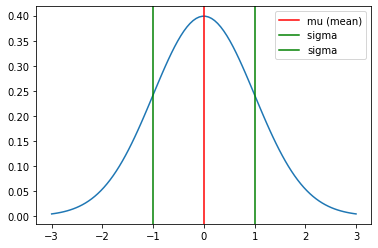

In [ ]:
#@title google "python plot normal distribution"

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(x=mu, label='mu (mean)', c="red")
plt.axvline(x=variance, label='sigma ', c="green")
plt.axvline(x=-variance, label='sigma', c="green")
plt.legend()
plt.show()

Toks skirstinys, koks pavaizduotas grafike, vadinamas *standard normal distribution*. Iš visų priežasčių, dėl kurių pageidaujama, jog spėjimams naudojami kintamiejų skirstinys būtų panašus į normalų, apsiribosiu viena - tai, kuri minima [scikit-learn dokumentacijoj](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) (ypatingai dėl to, jog didžioji dalis painiavos kyla dėl to kaip pagrindinės duomenų transformacijos aptariamos scikit-learn dokumentacijoj):


> "[...] they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance."


Būdas, kurio metu pakeičia kintamojo parametrus taip, kad kintamojo vidurkis taptų lygus nuliui, o dispersija - vienetui, vadinamas **standartizacija**. Standartizacija atliekama iš kiekvienos kintamojo vertės atimant kintamojo vidurkį ir rezultatą padalinant iš standartinio nuokrypio), pagal apačioje pateiktą formulę: 

z-score = $\frac{x - \mu}{\sigma}$

kur $\mu$ - vidurkis, $\sigma$ - imties standartinis nuokrypis, o *z-score* arba *standard score* žymima vertė, kurią gauname atlikę standartizaciją.

Tai, su kuo standartizacija paprastai yra maišoma, yra **normalizacija**. Normalizacija bendriausia prasme yra skėtinis terminas, kuris nurodo skirtingus būdas suteikti bendrą pagrindą skirtingiems kintamiesiems. Toks bendras pagrindas gali būti vienodos vidurkiai/standartiniai nuokrypiai (standartizacijos atveju) arba vienodas intervalas, kuriame varijuoja kintamųjų reikšmės (nuo nulio iki vieneto min-max normalizacijos, t. y. konkrečios normalizacijos atveju).

Taip, bendriausia prasme suprastos normalizacijos atžvilgiu, **standartizaciją galima laikyti viena iš normalizacijos atmainų/tipų** (dėl to standartizacija [Vikipedijoj](https://en.wikipedia.org/wiki/Feature_scaling) dar vadinama *z-score normalization*). Apie normalizaciją, tuo tarpu, pravers kalbėti **bendrąja** ir **siaurąja** prasmėmis.

## Ar standartizacija daro kintamojo skirstinį panašų į normalų?


Iš to, kas minima [scikit-learn dokumentacijoj](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler), galima spręsti, jog net ir atėmus vidurkį ir padalinis iš nuokrypio, vertės nebūtinai atrodys taip, kaip normaliame skirstinyje:

> "we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation"

Dėl to pasirodys skirti, kai apie normalųjų skirstinį kalbama turint omeny, jo formą ir kai apie normalųjį skirstinį kalbama turint omeny jo savybes (vidurkis lygus 0, o dispersija - 1). Viską iliuostriuosma duomenimis apie vynelį (nes *in vino veritas est*), tuo tarpu kintamuosius (dar tiksliau būtų sakyti atsitiktinius dydžius) imsim tik du - `pH` ir `alcohol`.

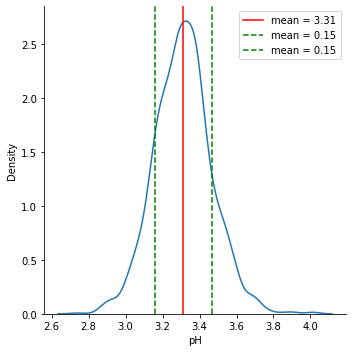

In [ ]:
df = pd.read_csv("winequality-red.csv")
ph = df['pH']

sns.displot(ph, kind='kde')
plt.axvline(ph.mean(), label = f'mean = {round(ph.mean(), 2)}', c='r')
plt.axvline(ph.mean()+ph.std(), ls='--', label = f'mean = {round(ph.std(), 2)}', c='g')
plt.axvline(ph.mean()-ph.std(), ls='--', label = f'mean = {round(ph.std(), 2)}', c='g')
plt.legend()

Jau sakiau, kad kad standartizuojant iš kiekvienos vertės atimamamas vidurkis, o atimties rezultatas padalinamas iš standartinio nuokrypio: 

In [ ]:
ph_standartized = (ph - ph.mean())/ph.std()

Mean of standartized pH: -0.00000000000000593792
Variance of standartized pH: 1.00000000000000266454


"Po dangčiu" iš kiekvienos `pH` vertės buvo atimtas vidurkis (3.31), o rezultatas - padalintas iš standartinio nuokrypio (kuris, kaip galima matyti iš grafiko, lygus apytiksliai 0.15). Jei kaip pavyzdį paimtumėm pirmosios eilutės alkoholio reikšmę:

In [97]:
df.loc[0].pH

3.51

Tai po standartizacijos, vietoj 3.51 atsiras

In [ ]:
(df.pH.loc[0] - 3.31) / 0.15

1.3333333333333317

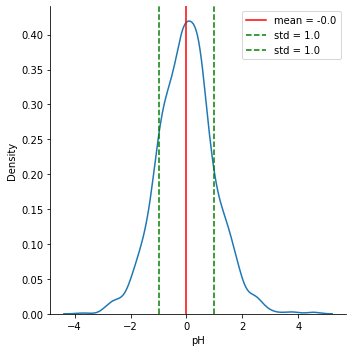

In [98]:
sns.displot(ph_standartized, kind='kde')
plt.axvline(ph_standartized.mean(), label = f'mean = {round(ph_standartized.mean(), 2)}', c='r')
plt.axvline(ph_standartized.mean()+ph_standartized.std(), ls='--', label = f'std = {round(ph_standartized.std(), 2)}', c='g')
plt.axvline(ph_standartized.mean()-ph_standartized.std(), ls='--', label = f'std = {round(ph_standartized.std(), 2)}', c='g')
plt.legend()

Iš grafiko matyti, kad skirstinio vidurkis po standartizacijos - lygus 0, o standartinis nuokrypis - 1. Vienintelė bėda, ta - jog `pH` skirstinys dar prieš standartizaciją priminė normalų, todėl neleidžia įsitikinti, ar dėl standartizacijos kintamojo verčių pasiskirstymas tikrai būtinai atrodys taip, kaip normaliam skirstiny. Dėl to paimkim ir dar vieną kintamąjį, `alcohol`:

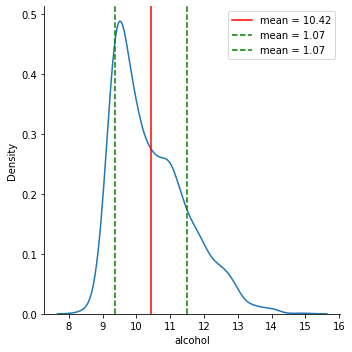

In [ ]:
sns.displot(df.alcohol, kind='kde')
plt.axvline(df.alcohol.mean(), label = f'mean = {round(df.alcohol.mean(), 2)}', c='r')
plt.axvline(df.alcohol.mean()+df.alcohol.std(), ls='--', label = f'mean = {round(df.alcohol.std(), 2)}', c='g')
plt.axvline(df.alcohol.mean()-df.alcohol.std(), ls='--', label = f'mean = {round(df.alcohol.std(), 2)}', c='g')
plt.legend()

In [99]:
alcohol_standartized = (df.alcohol - df.alcohol.mean())/df.alcohol.std()
print(f'Mean of standartized alcohol: {alcohol_standartized.mean():.20f}')
print(f'Variance of standartized alcohol: {alcohol_standartized.var():.20f}')

Mean of standartized alcohol: 0.00000000000002580411
Variance of standartized alcohol: 1.00000000000000133227


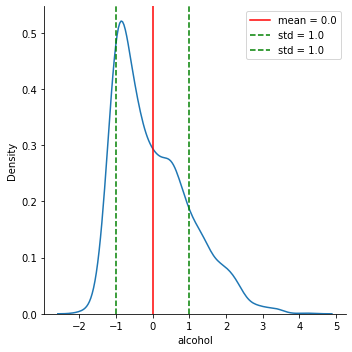

In [100]:
sns.displot(alcohol_standartized, kind='kde')
plt.axvline(alcohol_standartized.mean(), label = f'mean = {round(alcohol_standartized.mean(), 2)}', c='r')
plt.axvline(alcohol_standartized.mean()+alcohol_standartized.std(), ls='--', label = f'std = {round(alcohol_standartized.std(), 2)}', c='g')
plt.axvline(alcohol_standartized.mean()-alcohol_standartized.std(), ls='--', label = f'std = {round(alcohol_standartized.std(), 2)}', c='g')
plt.legend()

Galima matyti, jog nors standartizacija ir keičia tokius parametrus, kaip vidurkį ir nuokrypį, ji **nepakeičia to, kaip skirstinys atrodo pavaizduotas grafiškai.** 

Tuo tarpu procedūra, kurią vadinu standartizacija, sklearn atlieka [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

> "*Standardize features by removing the mean and scaling to unit variance.*"

## Ar dėl standartizacijos visų kintamųjų reikšmės "nugula" tam pačiam intervale?

Dar vienas dalykas, kurį buvo galima pastebėti, tai, jog jei intervalas, kuriame varijuoja reikšmės (range) po standartizacijos ir pakinta, tai jo ribos nėra vienodos tiek `pH`, tiek `alcohol`. Pavyzdžiui, `pH` varijavo nuo ~-4 iki ~4, o alkoholio procentas - nuo ~-2 iki 5.  

Procedūrą, kurios dėka pakeičiamas intervalas, kuriame varijuoja kintamųjų reikšmės, įprasta vadinti normalizacija:


> "*Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1* [...]" ([Machine Learning Mastery](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/))

> "*Normalization:
In this approach, the data is scaled to a fixed range — usually 0 to 1.* [...]" ([Machine Learning Mastery](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/))

Aišku tai, jog čia apie normalizaciją kalbama **siaurąja prasme** - t. y. ne kaip skėtinį terminą, kuris apima standartizaciją ir alternatyvas, bet kaip vieną standartizacijos alternatyvų.


Panašu, kad būtent tokiu skyrimu (normalizacija kaip skėtinis terminas/normalizacija kaip alternatyva standartizacijai) sekama ir sklearn dokumentacijoj ([6.3.1.1. Scaling features to a range](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)), kur būtent taip pristatoma ta pati procedūra:


> *An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.* 



Procedūra, kurią vadinu normalizacija siauraja prasme, sklearn atlieka [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).



> "*This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.The transformation is given by*":
> ```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```







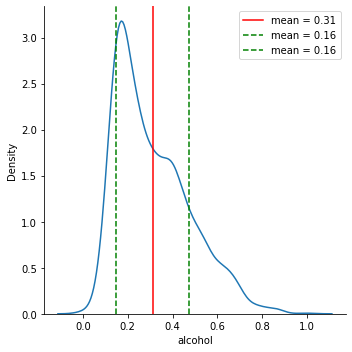

In [ ]:
alcohol_normalized = ((df.alcohol - df.alcohol.min(axis=0)) / (df.alcohol.max(axis=0) - df.alcohol.min(axis=0))) * (1 - 0) + 0

sns.displot(alcohol_normalized, kind='kde')
plt.axvline(alcohol_normalized.mean(), label = f'mean = {round(alcohol_normalized.mean(), 2)}', c='r')
plt.axvline(alcohol_normalized.mean()+alcohol_normalized.std(), ls='--', label = f'mean = {round(alcohol_normalized.std(), 2)}', c='g')
plt.axvline(alcohol_normalized.mean()-alcohol_normalized.std(), ls='--', label = f'mean = {round(alcohol_normalized.std(), 2)}', c='g')
plt.legend()

Pagrindinis tokios normalizacijos skirtumas nuo standartizacijos - **tai, jog priešingai nei standartizuojant, vidurkis nebus lygus 0, o standartinis nuokrypis - 1**:


> "*After MinMaxScaling, the distributions are not centered at zero and the standard deviation is not 1 [...] But the minimum and maximum values are standardized across variables, different from what occurs with standardization.*" [Towards AI](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)



Kita vertus, **priešingai, nei `StandardScaler` atveju, MinMaxScaler pasirūpina, kad skirtingų kintamųjų reikšmės varijuotų tam pačiam intervale**. Tuo galim įsitikinti ir patys:

In [ ]:
scaler = MinMaxScaler()
columns = df.columns

df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=columns)

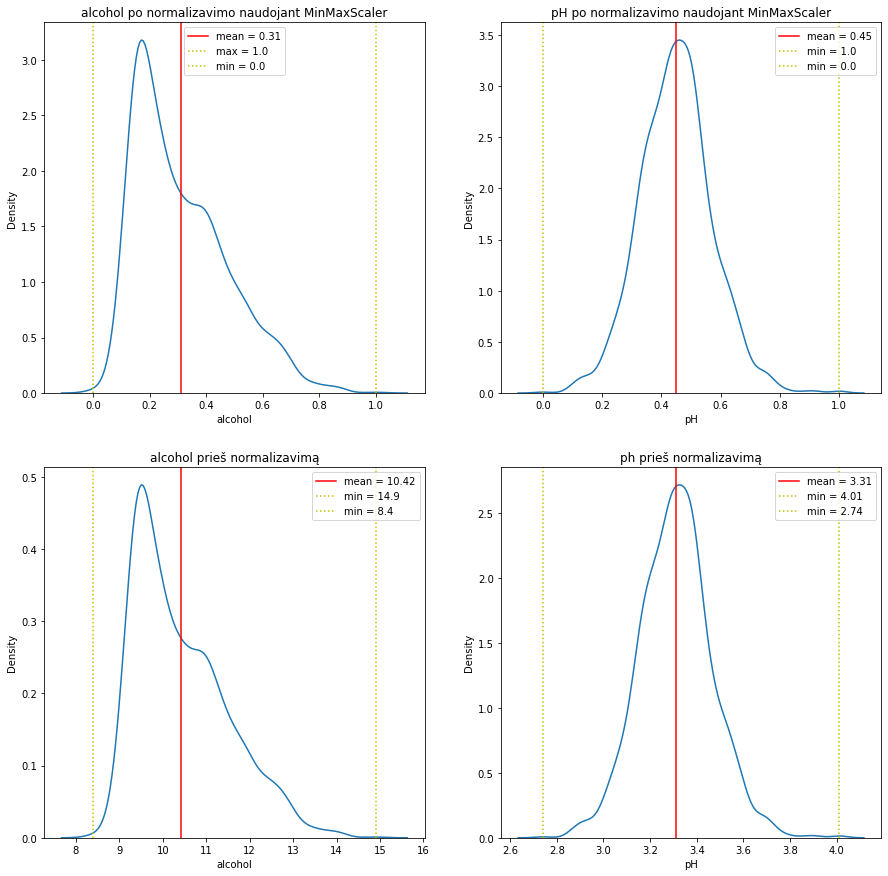

In [102]:
#@title Plots

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

a = sns.kdeplot(df_normalized.alcohol, ax = axs[0, 0])

axs[0, 0].axvline(df_normalized.alcohol.mean(), label = f'mean = {round(df_normalized.alcohol.mean(), 2)}', c='r')

axs[0, 0].axvline(df_normalized.alcohol.max(), ls=':', label = f'max = {round(df_normalized.alcohol.max(), 2)}', c='y')

axs[0, 0].axvline(df_normalized.alcohol.min(), ls=':', label = f'min = {round(df_normalized.alcohol.min(), 2)}', c='y')

b = sns.kdeplot(df_normalized.pH, ax = axs[0, 1])

axs[0, 1].axvline(df_normalized.pH.mean(), label = f'mean = {round(df_normalized.pH.mean(), 2)}', c='r')

axs[0, 1].axvline(df_normalized.pH.max(), ls=':', label = f'min = {round(df_normalized.pH.max(), 2)}', c='y')

axs[0, 1].axvline(df_normalized.pH.min(), ls=':', label = f'min = {round(df_normalized.pH.min(), 2)}', c='y')

c = sns.kdeplot(df.alcohol, ax = axs[1,0])

axs[1, 0].axvline(df.alcohol.mean(), label = f'mean = {round(df.alcohol.mean(), 2)}', c='r')

axs[1, 0].axvline(df.alcohol.max(), ls=':', label = f'min = {round(df.alcohol.max(), 2)}', c='y')

axs[1, 0].axvline(df.alcohol.min(), ls=':', label = f'min = {round(df.alcohol.min(), 2)}', c='y')

d = sns.kdeplot(df.pH, ax = axs[1, 1])

axs[1, 1].axvline(df.pH.mean(), label = f'mean = {round(df.pH.mean(), 2)}', c='r')

axs[1, 1].axvline(df.pH.max(), ls=':', label = f'min = {round(df.pH.max(), 2)}', c='y')

axs[1, 1].axvline(df.pH.min(), ls=':', label = f'min = {round(df.pH.min(), 2)}', c='y')

fig.set(facecolor='white')
axs[0, 0].legend()
axs[0, 0].set_title("alcohol po normalizavimo naudojant MinMaxScaler")
axs[0, 1].legend()
axs[0, 1].set_title("pH po normalizavimo naudojant MinMaxScaler")
axs[1, 0].legend()
axs[1, 0].set_title("alcohol iki normalizuojant")
axs[1, 1].legend()
axs[1, 1].set_title("ph iki normalizuojant")
plt.show()


Svarbiausia, kad nors priešingai nei standartizuojant, normalizuojant naudojanat MinMaxScaler intervalai, kuriuose varijuoja skirtingų kintamųjų reikšmės tapo vienodos, **nei standartizuojant, nei normalizuojant duomenis grafiškai vaizduojamas skirstinys nepasikeitė**.

# Ar standartizacija yra tas pats pats, kas tranformacija?

Aišku, bet kokį duomenų keitimą galima vadinti transformacijom. Bet tokiu atveju nelieka atskiro termino, kuriuo nuo būtų galima skirti tai, ką atlieka sklearn [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer). PowerTransformer leidžia pasirūpinti tuo, jog skirstinys taptų vizualiai panašus į normalųjį. Be to, tai, jog PowerTransformer, paverčia skirstinį normaliu, tiek sklearn dokumentacijoje, tiek kitose šaltiniuose dažnai minima kaip pagrindinė PowerTransformer paskirtis:



>"*Power transforms are a family of* [...] *transformations that are applied to make data more Gaussian-like*" [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)






In [ ]:
# visos scikit-learn klasės "išspjauna" matricą
columns = df.columns 

# Yeo-Johnson, kuris yra numatytasis
transformer = PowerTransformer()
df_transformed_yj = transformer.fit_transform(df)
df_transformed_yj = pd.DataFrame(df_normalized, columns=columns)

# Box-Cox
transformer = PowerTransformer(method='box-cox')
alcohol_bc = transformer.fit_transform(df.alcohol.values.reshape(-1, 1))
alcohol_bc = pd.Series(alcohol_bc.reshape(-1))

# Log
alcohol_log = np.log(df.alcohol.values)

# Sqrt
alcohol_sqrt = np.sqrt(df.alcohol.values)

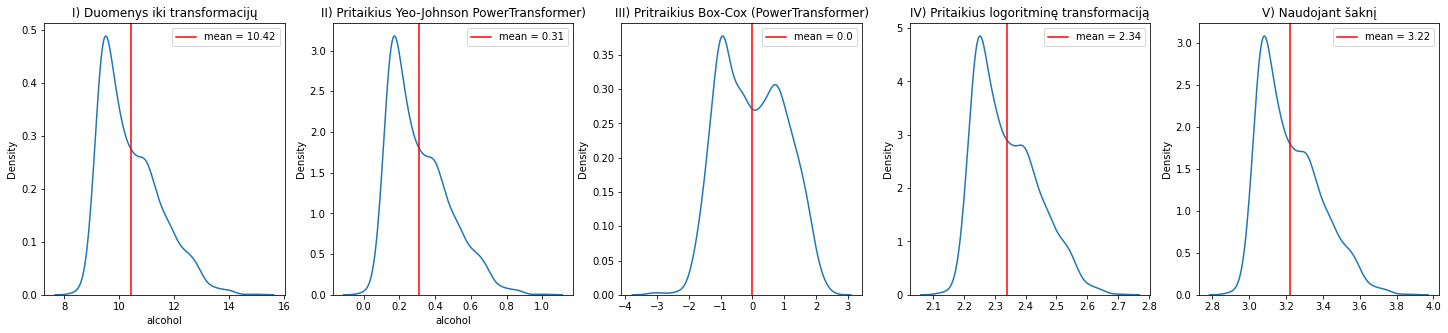

In [ ]:
#@title Plots

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(25,5))

a = sns.kdeplot(df.alcohol, ax = axs[0])

axs[0].axvline(df.alcohol.mean(), label = f'mean = {round(df.alcohol.mean(), 2)}', c='r')

b = sns.kdeplot(df_transformed_yj.alcohol, ax = axs[1])

axs[1].axvline(df_transformed_yj.alcohol.mean(), label = f'mean = {round(df_transformed_yj.alcohol.mean(), 2)}', c='r')

c = sns.kdeplot(alcohol_bc, ax = axs[2])

axs[2].axvline(alcohol_bc.mean(), label = f'mean = {round(alcohol_bc.mean(), 2)}', c='r')

d = sns.kdeplot(alcohol_log, ax = axs[3])

axs[3].axvline(alcohol_log.mean(), label = f'mean = {round(alcohol_log.mean(), 2)}', c='r')

e = sns.kdeplot(alcohol_sqrt, ax = axs[4])

axs[4].axvline(alcohol_sqrt.mean(), label = f'mean = {round(alcohol_sqrt.mean(), 2)}', c='r')

axs[0].legend()
axs[0].set_title('I) Duomenys iki transformacijų')
axs[1].legend()
axs[1].set_title('II) Pritaikius Yeo-Johnson PowerTransformer)')
axs[2].legend()
axs[2].set_title('III) Pritraikius Box-Cox (PowerTransformer)')
axs[3].legend()
axs[3].set_title('IV) Pritaikius logoritminę transformaciją')
axs[4].legend()
axs[4].set_title('V) Naudojant šaknį')
plt.show()

Galima matyti, tik III) atveju, skirstinys tampa panašiausias į normalųjų. Spręsti likusių atvejų panašumą į normalųjį skirstinį vizualiai beveik neišeina. 

Kita vertus, tik tai, ką dera vadinu transformacijomis siauresniąja prasme (tai, ką atlikti leidžia PowerTransformer metodai, logoritminė transformacija ir transformacija naudojant kvadratinę šaknį ir kt.), atlieka tai, ko kartais tikimasi iš standartizacijos ar normalizacijos - *daro skirstinį panašų į normalųjį* (kalbant apie jo formą).

## Ar normalizacija kuo nors siejasi su reguliarizacija?

Priežastis, dėl kurios sklearn dokumentacijoje ([6.3.1.1. Scaling features to a range](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)) tai, ką normalizacija siaurąja prasme vadinu aš, vadinama "alternatyvia standartizacija" - ta, jog terminas "normalizacija" rezervuotas kai kam kitam. [6.3.3. Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) Normalizacija susiejama su sklearn [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer), kuris 

> "*Normalize samples individually to unit norm. Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.*"

L1 ar L2, kurios pateiktos kaip galimos vertės Normalizer hyperparametrui "norm", įprasta asocijuoti su parametrų (*weight* ir *bias*), kuriuos modelis išmoksta, apribojimu (*penalizing*). Būtent toks vieno iš parametrų - svorio apribojimas paprastai vadinamas reguliarizacija. Kaip konkretūs reguliarizacijos pavyzdžiai, Google Machine Learning Crash course terminų žodynėly, pateikti L1 reguliarizacija ir L2 reguliarizacija:

> "[L1 Regularization](https://developers.google.com/machine-learning/glossary#l1-regularization): *A type of regularization that penalizes weights in proportion to the sum of the absolute values of the weights. In models relying on sparse features, L1 regularization helps drive the weights of irrelevant or barely relevant features to exactly 0, which removes those features from the model. Contrast with L2 regularization.*"

> [L2 Reguliarizacija](https://developers.google.com/machine-learning/glossary#l2-regularization) A type of regularization that penalizes weights in proportion to the sum of the squares of the weights. L2 regularization helps drive outlier weights (those with high positive or low negative values) closer to 0 but not quite to 0. (Contrast with L1 regularization.) L2 regularization always improves generalization in linear models.






 




Sekant [straipsniu, kurį ](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261)Prisiminkim, jog tiesinės regresijos modelis atrodo taip: 

$ \hat{y} = wx + b$

kur, $\hat{y}$ spėta $y$ vertė, $w$ - kintamojo svoris (*weight*), $x$ - kintamojo reikšmė, $b$ - *intercept*, arba laisvasis narys, postūmio parametras (taip vadinamas vadovėliuose). Neretai į formulę dar įtraukiamas ir $\epsilon$, kurį praleisiu sekdamas [straipsniu, kurį perskaityti pravers bet kuriuo atveju](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261)

*Loss function*, arba nuostolio funkcija (taip verčiama MIF svetainėje prieinamam [DI sąvokų žodynėly](https://klevas.mif.vu.lt/~linp/page/savokos.html)), apibrėžiama kaip skirtumas tarp spėtosios vertės ir tikrosios vertės:

$L = (\hat{y} - y)^2 = (wx + b - y)^2$

Taip nuostolio funkcija skaičiuojama tiesinėje regresijoje, kurią sklearn atitinka [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Tai, kaip reguliarizacija L1, skiriasi nuo normalizacijos, aišku iš to, kaip ji pasirodo nuostolio funkcijoj:

$L_1 = (wx + b - y)^2 + \lambda|w|$

kur $\lambda$ vadinamas *reguliarization parameter*.

Tai, kas funkcijoje pasirodo kaip $\lambda|w|$ yra vadinamas *regularization term*. L2 reguliacijoje *reguliarization term* iš $\lambda|w|$ virsta $\lambda w^2$:

$L_2 = (wx + b - y)^2 + \lambda w^2$

L1 ir L2 reguliarizaciją leidžia pritaikyti atitinkamai sklearn [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso) ir [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge). Tiek Lasso, tiek Ridge dokumentacijoje, *regularization term* vadinamas *alpha*:



> **alpha**: *Constant that multiplies the L1 term* ([Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso))

> **alpha**:
*Regularization strength; must be a positive float.* [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge))


## Kas siejasi L1/L2 kalbant apie reguliarizaciją ir L1/L2 kalbant apie normalizaciją

Jau minėjau, kad tai, kaip kalbėti apie normalizaciją yra įprasta ne visai atitinka tai, kaip apie normalizaciją kalbama sklearn dokumentacijoje. L1 ir L2 pasirodymą abiejuose kontekstuose - kalbant apie reguliarizaciją ir kalbant apie normalizaciją lemia tai, jog L1 ir L2 vadinamos atitinkamos normos:

L1 norma: $||\mathbf{w}||_1 = \sum_{i}^{} | w_i| = |w_1| + |w_2| + \dotso + |w_i|$

L2 norma: $||\mathbf{w}||_2 = \sqrt{\sum_{i}^{} |w_i|^2} = \sqrt{|w_1|^2 + |w_2|^2 + \dotso + |w_i|^2}$

Normalize tam tikra prasme primena tai, ką daro StandardScaler: StandardScaler iš kiekvienos vertės atima kintamojo vidurkį ir padalina rezultatą iš standartinio nuokrypio, Normalize kiekvieną vertę dalina iš atitinkamos (L1 arba L2) normos. Tai yra, 

$x' = \frac{x}{||x||_1}$ L1 atveju, 

kur

$||x||_1 = |x_1| + |x_2| + \dotso + |x_i|$

ir 

$x' = \frac{x}{||x||_2}$ L2 atveju, 

kur

$||x||_2 = \sqrt{x_1^2 + x_2^2 + \dotso + x_i^2}$

Svarbu atkreipti dėmesį, kad Normalize keičia vertes dar iki modeliavimo, kai Lasso taikoma L1 ir Ridge taikoma L2 reguliarizacijos keičia modelio parametrus, bet nekeičia verčių. Kitais žodžiais, galima normalizuoti duomenis naudojant Normalize su L1 norma, bet netaikyti L1 reguliarizacijos. Lygiai taip pat, galima taikyti L1 reguliarizaciją, bet netaikyti normalizavimo su L1 norma. 

In [ ]:
l1_norm_alcohol = df.alcohol.apply(lambda x: abs(x)).sum()
df_alcohol_manually_normalized_using_l1 = df.alcohol / l1_norm_alcohol
df_alcohol_manually_normalized_using_l1.sum()

1.0

In [ ]:
df_alcohol_normalized_using_l1 = normalize(df.alcohol.values.reshape(-1, 1), norm='l1', axis=0)
df_alcohol_normalized_using_l1.sum()

1.0

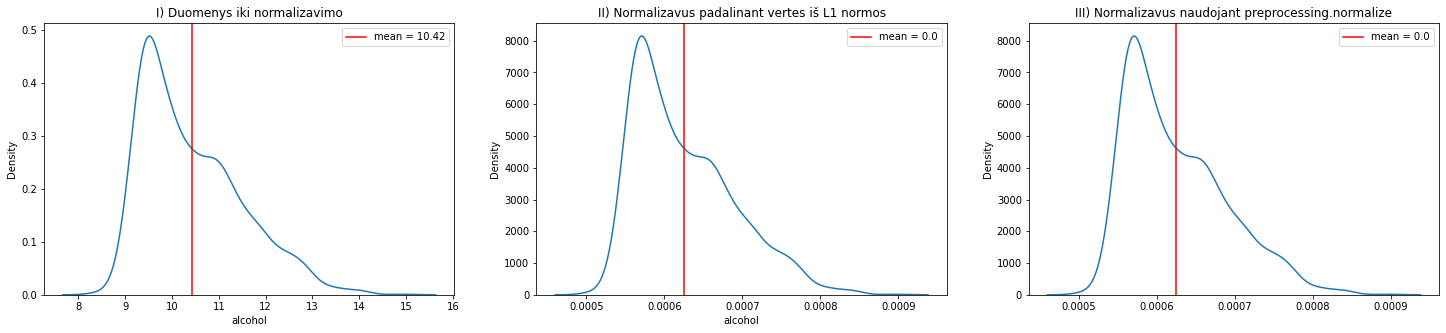

In [ ]:
#@title Dar ne pačių išvaizdžiausių grafikų

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25,5))

a = sns.kdeplot(df.alcohol, ax = axs[0])

axs[0].axvline(df.alcohol.mean(), label = f'mean = {round(df.alcohol.mean(), 2)}', c='r')

axs[0].set_title('I) Duomenys iki normalizavimo')
axs[0].legend()

b = sns.kdeplot(df_alcohol_manually_normalized_using_l1, ax = axs[1])

axs[1].axvline(df_alcohol_manually_normalized_using_l1.mean(), label = f'mean = {round(df_alcohol_manually_normalized_using_l1.mean(), 2)}', c='r')

axs[1].set_title('II) Normalizavus padalinant vertes iš L1 normos')
axs[1].legend()

c = sns.kdeplot(pd.Series(df_alcohol_normalized_using_l1.reshape(-1)), ax = axs[2])

axs[2].axvline(pd.Series(df_alcohol_normalized_using_l1.reshape(-1)).mean(), label = f'mean = {round(pd.Series(df_alcohol_normalized_using_l1.reshape(-1)).mean(), 2)}', c='r')

axs[2].set_title('III) Normalizavus naudojant preprocessing.normalize')
axs[2].legend()

Priežastis, dėl kurios panaudojau [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html?highlight=normalize#sklearn.preprocessing.normalize), o ne [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) - [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html?highlight=normalize#sklearn.preprocessing.normalize) leidžia pasirinkti, vertikaliai (stulpelio vertės) ar horizontaliai (eilės vertės) sumuojamos. Sumuoti vertes vertikaliai pasirinkau tam, kad, viena vertus, būtų galima sklearn per [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html?highlight=normalize#sklearn.preprocessing.normalize) atliekamą normalizaciją sugretinti su sklearn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) atliekama standartizacija, kurioje keičiamos vieno stulpelio vertės. Kita vertus, taip išryškėja ir pagrindinis skirtumas: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) keičia vertes stulpelio ribose (vertikaliai), o [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) - eilutės ribose (horizontaliai).

Ties šita vieta pavargau, todėl metas apibendrint:
 - StandardScaler vykdo **standartizaciją** ir pasirūpins, kad kiekvieno iš kintamųjų, kuris bus naudojamas spėjimui, reikšmių vidurkis bus lygus 0, o standartinis nuokrypis - 1. Intervalas, kuriame reikšmės variuoja, nebus fiksuotas, kaip MinMaxScaler atveju.
 - MinMaxScaler vykdo **normalizaciją** ir pasirūpins, kad kiekvieno iš kintamųjų reikšmės varijuotų fiksuotam intervale (nuo 0 iki 1). Vidurkis nebus lygus 0, o standartinis nuokrypis - 1, kaip StandardScaler atveju.
 - Normalizer irgi vykdo **normalizaciją** ir pasirūpina, kad visų vienos eilutės reikšmių suma būtų lygi 1. Vidurkis ir vėl 0 (nes visų reikšmių suma lygi 1), o ar standartinis nuokrypis irgi fiksuotas - nežinau. 
 - PowerTransformer vykdo **transformaciją** ir pasirūpina, kad išsikreipęs skirstinys vizualiai labiau primintų normalų. Vidurkis nebus lygis 0, kaip standartizacijos atveju. Ar reikšmės varijuos skirtingam intervale priešingai nei normalizuojant su MinMaxScaler - nežinau, bet atrodo, kad taip.
 
 Visos šitos procedūros atliekamos iki imantis modeliavimo. Tuo tarpu
 - Lasso ir Ridge yra tiesinio modelio variantai, kurie taiko **reguliarizaciją**. L1 ir L2 čia pasirodo kaip skirtingi būdai apriboti modelio svorius, o ne keisti duomenų, kurie bus naudojami modeliui, savybes (kaip Normalizer atveju).